In [1]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


Heute=dt.datetime.now().strftime('%y-%m-%d')

FileName="Nano-content"

def normalisierung(Stock): 
    return (Stock-Stock.min())/(Stock.max()-Stock.min())

filename=Heute+"_NYtimes_"+FileName.replace(" ","_")

def openFile(filename):
    with open(filename) as json_file:
        data = json.load(json_file)
    return data
        
        
def writeFile(filename, data):
    def defaultconverter(o):
        if isinstance(o, datetime.datetime):
            return o.__str__()

    with open(filename, 'w') as fp:
        json.dump(data,fp, default = defaultconverter)
    

In [13]:
df=pd.read_json("23-05-06_NYtimes_ChatGPT.json", convert_dates=['pub_date']).drop_duplicates("lead_paragraph",keep="first")

type_of_material="News"
df=df[df.type_of_material==type_of_material]

In [14]:
df.snippet

0      Also, the Wagner chief threatens to withdraw f...
3      Articles from around The Times, narrated just ...
4           Is Bluesky the long-awaited heir to Twitter?
5      It warned me I might “distract” my job intervi...
7      The regional lender said it is weighing its op...
                             ...                        
312    The Federal Reserve’s commitment to vanquish i...
316    Siri, Google Search, online marketing and your...
318    OpenAI’s new chatbot is a coder, a teacher, a ...
322    The European Union is crying foul over the Inf...
323    A new chatbot from OpenAI is inspiring awe, fe...
Name: snippet, Length: 191, dtype: object

In [15]:
df=df.join(pd.json_normalize(df.headline))

In [18]:

df["pub_date"] = df["pub_date"].dt.tz_localize(None)
short=df[["pub_date","main","abstract","web_url"]]
short.to_excel(Heute+"_ChatGPT.xlsx")

In [33]:
ab=df[df.abstract.str.contains("GPT")]

print(len(ab))

for index, row in ab.iterrows():
    print(index,row["pub_date"],row["headline"]["main"],"\n",row["lead_paragraph"].split(". ")[0], "\n")

11
14 2023-05-02 20:18:19 Generative A.I. Start-Up Cohere Valued at About $2 Billion in Funding Round 
 Cohere, a Toronto artificial intelligence start-up, has raised $250 million in new funding, two people with knowledge of the situation said, in yet another sign of feverish interest in a new kind of A.I 

55 2023-04-17 09:00:19 All Seal Needs Is Love 
 The singer and songwriter Seal is one of modern music’s most ardent believers in the power of love, but that doesn’t mean you should look to him for romantic advice 

69 2023-04-07 17:49:35 Love Letter: Falling for a Chatbot 
 In this week’s Modern Love essay, “Uh Oh, I Seem to Be Dating a Chatbot,” Anita M 

106 2023-03-27 16:04:04 Artificial Intelligence Glossary: Neural Networks and Other Terms Explained 
 We’ve compiled a list of phrases and concepts useful to understanding artificial intelligence, in particular the new breed of A.I.-enabled chatbots like ChatGPT, Bing and Bard. 

117 2023-03-23 09:00:18 Chatbot Start-Up Character.

In [20]:
# Extend the Nano Text with headline and abstaract

df[df.lead_paragraph.str.len()<10]

df["text"]=[i["main"] for i in df["headline"]]+df.snippet+df.lead_paragraph+df.abstract


In [34]:
import hype

Key_hypes=hype.keyWords()

def textCheck(txt,keys=Key_hypes):
   
    exp=[]

    for key in keys:
        if key in txt.lower(): ## To include capitalized strings, I added .lower() in the search
            
            #uncertainD[key].extend([parag])
            
            match=[match for match in txt.split(". ") if key in match]
            exp+=match
            
    return exp

for key in Key_hypes.keys():
    df[key]=df.text.apply(textCheck,keys=Key_hypes[key])


df["hype"]=df.text.apply(textCheck,keys=Key_hypes["hype"])

df.head()

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,...,seo,sub,text,uncertainty,ignorance,hype,however,entities,verbs,nouns
5,It warned me I might “distract” my job intervi...,https://www.nytimes.com/2023/05/05/style/chatg...,It warned me I might “distract” my job intervi...,"Since I first watched the movie “Clueless,” I’...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'I Asked ChatGPT to Be My Stylist', '...","[{'name': 'subject', 'value': 'Artificial Inte...",2023-05-05 09:00:34,article,...,None,None,I Asked ChatGPT to Be My StylistIt warned me I...,[I Asked ChatGPT to Be My StylistIt warned me ...,[],[Is this thing from 2023 or 1953?Since I first...,[],"((2023), (first), (Clueless), (Cher, Horowitz)...","[ask, warn, distract, watch, dream, pick, warn...","[chatgpt, job, interviewer, thing, movie, clos..."
7,The regional lender said it is weighing its op...,https://www.nytimes.com/2023/05/04/business/de...,The regional lender said it is weighing its op...,The regional banking sector is teetering again...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'PacWest’s Stock Plunge Reignites Ban...,"[{'name': 'subject', 'value': 'internal-storyl...",2023-05-04 12:04:43,article,...,None,None,PacWest’s Stock Plunge Reignites Banking Secto...,[],[],[PacWest’s Stock Plunge Reignites Banking Sect...,[],"((PacWest, ’s, Stock, Plunge, Reignites), (the...","[say, weigh, fall, contain, teeter, plummet, s...","[lender, option, share, assertion, bank, crisi..."
11,A ‘shock pause’ by the central bank would spoo...,https://www.nytimes.com/2023/05/03/business/fe...,A ‘shock pause’ by the central bank would spoo...,"If market predictions are correct, the Fed on ...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Markets Expect the Fed to Raise Rate...,"[{'name': 'subject', 'value': 'Banking and Fin...",2023-05-03 12:04:33,article,...,None,None,Markets Expect the Fed to Raise Rates Despite ...,[Markets Expect the Fed to Raise Rates Despite...,[],[Markets Expect the Fed to Raise Rates Despite...,[],"((Fed), (one), (Fed), (Wednesday), (a, quarter...","[expect, raise, spook, say, fall, raise, grow,...","[market, shock, pause, bank, market, analyst, ..."
13,"Also, the fallout from the Hollywood writers’ ...",https://www.nytimes.com/2023/05/02/briefing/de...,"Also, the fallout from the Hollywood writers’ ...",With the U.S. now projected to run out of mone...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'A Debt Limit Secret Weapon', 'kicker...",[],2023-05-02 22:07:32,article,...,None,None,"A Debt Limit Secret WeaponAlso, the fallout fr...",[],[],"[A Debt Limit Secret WeaponAlso, the fallout f...",[],"((WeaponAlso), (Hollywood), (year), (Tony), (t...","[’, need, know, project, run, pay, consider, a...","[fallout, writer, strike, year, nomination, en..."
14,"Founded by ex-Google researchers, the Toronto ...",https://www.nytimes.com/2023/05/02/technology/...,"Founded by ex-Google researchers, the Toronto ...","Cohere, a Toronto artificial intelligence star...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Generative A.I. Start-Up Cohere Valu...,"[{'name': 'subject', 'value': 'Venture Capital...",2023-05-02 20:18:19,article,...,None,None,Generative A.I. Start-Up Cohere Valued at Abou...,[],[],[Start-Up Cohere Valued at About $2 Billion in...,[Start-Up Cohere Valued at About $2 Billion in...,"((A.I., Start), (About, $, 2, Billion), (Toron...","[value, prepare, compete, raise, say, found, p...","[start, ex, researcher, company, start, up, cr..."


In [22]:
# only when hype

df=df[df.hype.str.len()>1]

In [23]:
import spacy
nlp=spacy.load("en_core_web_sm")

# Reurn multiple columns from apply()


def entVerb(t):
    plain=t["text"]

    #plain=" ".join(t.hype)
    doc=nlp(plain)
    
    verbs=[]
    nouns=[]
    for token in doc:
        if str(token.pos_) == "VERB":
            verbs+=[token.lemma_]  
    nouns=[]
    for token in doc:
        if str(token.pos_) == "NOUN":
            nouns+=[token.lemma_]      

    
    return doc.ents, verbs,nouns

df[["entities","verbs","nouns"]]=df.apply(entVerb, axis=1, result_type="expand")
df.head()

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,...,seo,sub,text,uncertainty,ignorance,hype,however,entities,verbs,nouns
5,It warned me I might “distract” my job intervi...,https://www.nytimes.com/2023/05/05/style/chatg...,It warned me I might “distract” my job intervi...,"Since I first watched the movie “Clueless,” I’...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'I Asked ChatGPT to Be My Stylist', '...","[{'name': 'subject', 'value': 'Artificial Inte...",2023-05-05 09:00:34,article,...,None,None,I Asked ChatGPT to Be My StylistIt warned me I...,[I Asked ChatGPT to Be My StylistIt warned me ...,[],[Is this thing from 2023 or 1953?Since I first...,[],"((2023), (first), (Clueless), (Cher, Horowitz)...","[ask, warn, distract, watch, dream, pick, warn...","[chatgpt, job, interviewer, thing, movie, clos..."
7,The regional lender said it is weighing its op...,https://www.nytimes.com/2023/05/04/business/de...,The regional lender said it is weighing its op...,The regional banking sector is teetering again...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'PacWest’s Stock Plunge Reignites Ban...,"[{'name': 'subject', 'value': 'internal-storyl...",2023-05-04 12:04:43,article,...,None,None,PacWest’s Stock Plunge Reignites Banking Secto...,[],[],[PacWest’s Stock Plunge Reignites Banking Sect...,[],"((PacWest, ’s, Stock, Plunge, Reignites), (the...","[say, weigh, fall, contain, teeter, plummet, s...","[lender, option, share, assertion, bank, crisi..."
11,A ‘shock pause’ by the central bank would spoo...,https://www.nytimes.com/2023/05/03/business/fe...,A ‘shock pause’ by the central bank would spoo...,"If market predictions are correct, the Fed on ...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Markets Expect the Fed to Raise Rate...,"[{'name': 'subject', 'value': 'Banking and Fin...",2023-05-03 12:04:33,article,...,None,None,Markets Expect the Fed to Raise Rates Despite ...,[Markets Expect the Fed to Raise Rates Despite...,[],[Markets Expect the Fed to Raise Rates Despite...,[],"((Fed), (one), (Fed), (Wednesday), (a, quarter...","[expect, raise, spook, say, fall, raise, grow,...","[market, shock, pause, bank, market, analyst, ..."
13,"Also, the fallout from the Hollywood writers’ ...",https://www.nytimes.com/2023/05/02/briefing/de...,"Also, the fallout from the Hollywood writers’ ...",With the U.S. now projected to run out of mone...,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'A Debt Limit Secret Weapon', 'kicker...",[],2023-05-02 22:07:32,article,...,None,None,"A Debt Limit Secret WeaponAlso, the fallout fr...",[],[],"[A Debt Limit Secret WeaponAlso, the fallout f...",[],"((WeaponAlso), (Hollywood), (year), (Tony), (t...","[’, need, know, project, run, pay, consider, a...","[fallout, writer, strike, year, nomination, en..."
14,"Founded by ex-Google researchers, the Toronto ...",https://www.nytimes.com/2023/05/02/technology/...,"Founded by ex-Google researchers, the Toronto ...","Cohere, a Toronto artificial intelligence star...",The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Generative A.I. Start-Up Cohere Valu...,"[{'name': 'subject', 'value': 'Venture Capital...",2023-05-02 20:18:19,article,...,None,None,Generative A.I. Start-Up Cohere Valued at Abou...,[],[],[Start-Up Cohere Valued at About $2 Billion in...,[Start-Up Cohere Valued at About $2 Billion in...,"((A.I., Start), (About, $, 2, Billion), (Toron...","[value, prepare, compete, raise, say, found, p...","[start, ex, researcher, company, start, up, cr..."


In [24]:
sample="W"
df.set_index("pub_date").resample(sample).sum()

,word_count,print_page
pub_date,,
2022-12-11,1379,1.0
2022-12-18,4109,0.0
2022-12-25,3360,4.0
2023-01-01,1407,1.0
2023-01-08,6976,1.0
2023-01-15,4086,1.0
2023-01-22,4066,2.0
2023-01-29,8720,7.0
2023-02-05,8018,6.0


In [2]:
group=df.set_index("pub_date").groupby(pd.Grouper(freq='5D'))["hype"].sum()
group

NameError: name 'df' is not defined

In [1]:
from collections import Counter

group=df.set_index("pub_date").groupby(pd.Grouper(freq='M'))["nouns"].sum()

Wordyear={}
for i, row in group.iteritems():
    c=Counter(row).most_common(15)
    Wordyear[str(i)]=c
    #print(c,"\n")
CountDF=pd.DataFrame.from_dict(Wordyear, orient='index').T

print("Most common words over the years in Sustainable AI abstracts")
CountDF

NameError: name 'df' is not defined

In [30]:
CountDF.style.background_gradient(axis=0, low=1, high=30.0)  

,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00
0,"('year', 5)","('company', 13)","('chatbot', 23)","('intelligence', 21)","('company', 15)","('bank', 5)"
1,"('chatbot', 4)","('week', 7)","('intelligence', 14)","('chatbot', 18)","('video', 7)","('start', 4)"
2,"('world', 4)","('intelligence', 6)","('chatgpt', 9)","('technology', 15)","('wake', 4)","('market', 4)"
3,"('inflation', 4)","('chatbot', 6)","('technology', 8)","('bank', 14)","('collapse', 4)","('share', 4)"
4,"('journalist', 4)","('year', 6)","('tech', 8)","('company', 11)","('month', 4)","('lender', 4)"
5,"('executive', 4)","('investment', 5)","('industry', 8)","('way', 11)","('deposit', 4)","('letter', 3)"
6,"('homework', 3)","('sale', 5)","('company', 7)","('chatgpt', 10)","('percent', 4)","('technology', 3)"
7,"('chatgpt', 3)","('tool', 5)","('search', 7)","('language', 10)","('growth', 4)","('researcher', 3)"
8,"('market', 3)","('plan', 5)","('engine', 7)","('software', 8)","('lender', 3)","('up', 3)"
9,"('lawmaker', 3)","('founder', 5)","('conversation', 7)","('start', 8)","('pressure', 3)","('moratorium', 2)"


<AxesSubplot: xlabel='pub_date'>

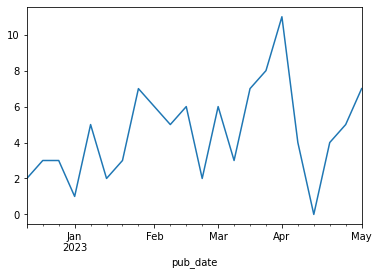

In [31]:
df.set_index("pub_date").resample("W").size().plot()